# Importing needed libraries



In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns



# loading data and discover it


In [58]:
data = pd.read_csv('survey.csv')
data.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [59]:
#saving columns names and number of them
n_cols = data.shape[1]
col_names = data.columns
col_names

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

####  we see that column names form are inconsistent , there are nan values , and a lot of strings so that must be edited in cleaning data

## Let's take a look at the data
first we can figure out the spread of age values

<Axes: >

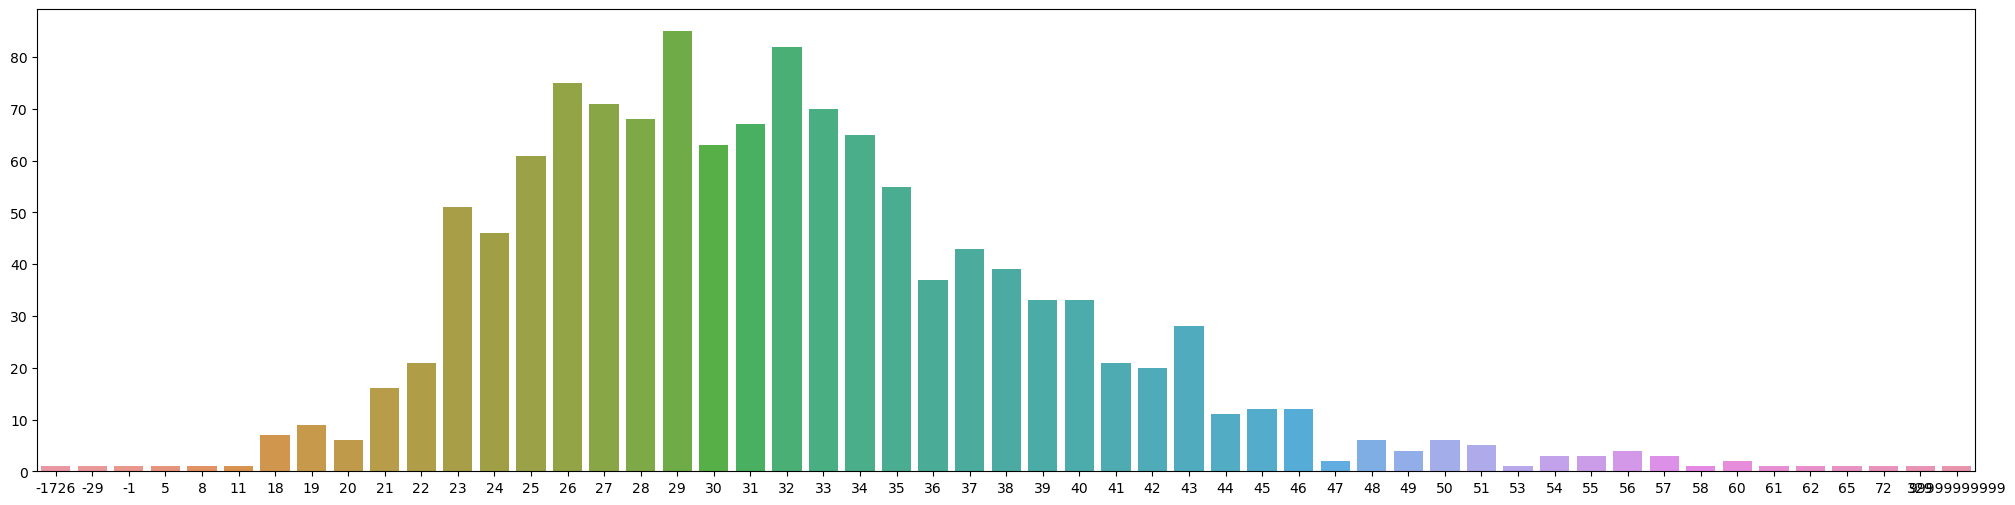

In [60]:
plt.figure(figsize=(25,6))

# we will used value_count() to know the number of rows for each value on the dataset
age_counts = data['Age'].value_counts()

sns.barplot(x=age_counts.index, y=age_counts.values)
#sns.lineplot(data=data,y='treatment',x='Country')

### treatment will be our target so let's figure it out

<Axes: xlabel='treatment'>

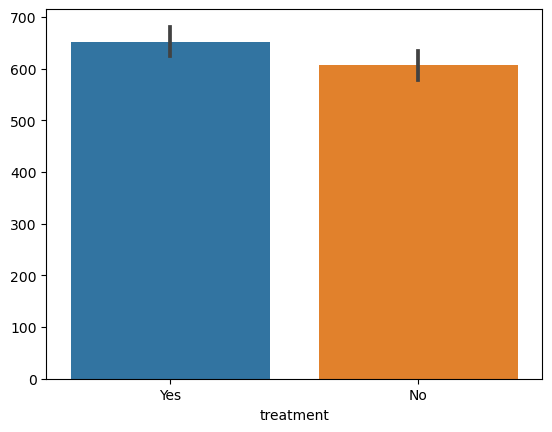

In [61]:
sns.barplot(y=data.index, x=data['treatment'])

 okay, it's clear that most of people in this sample have sought a treatment for a mental health condition

### let's plot some columns to see thier values and percentage

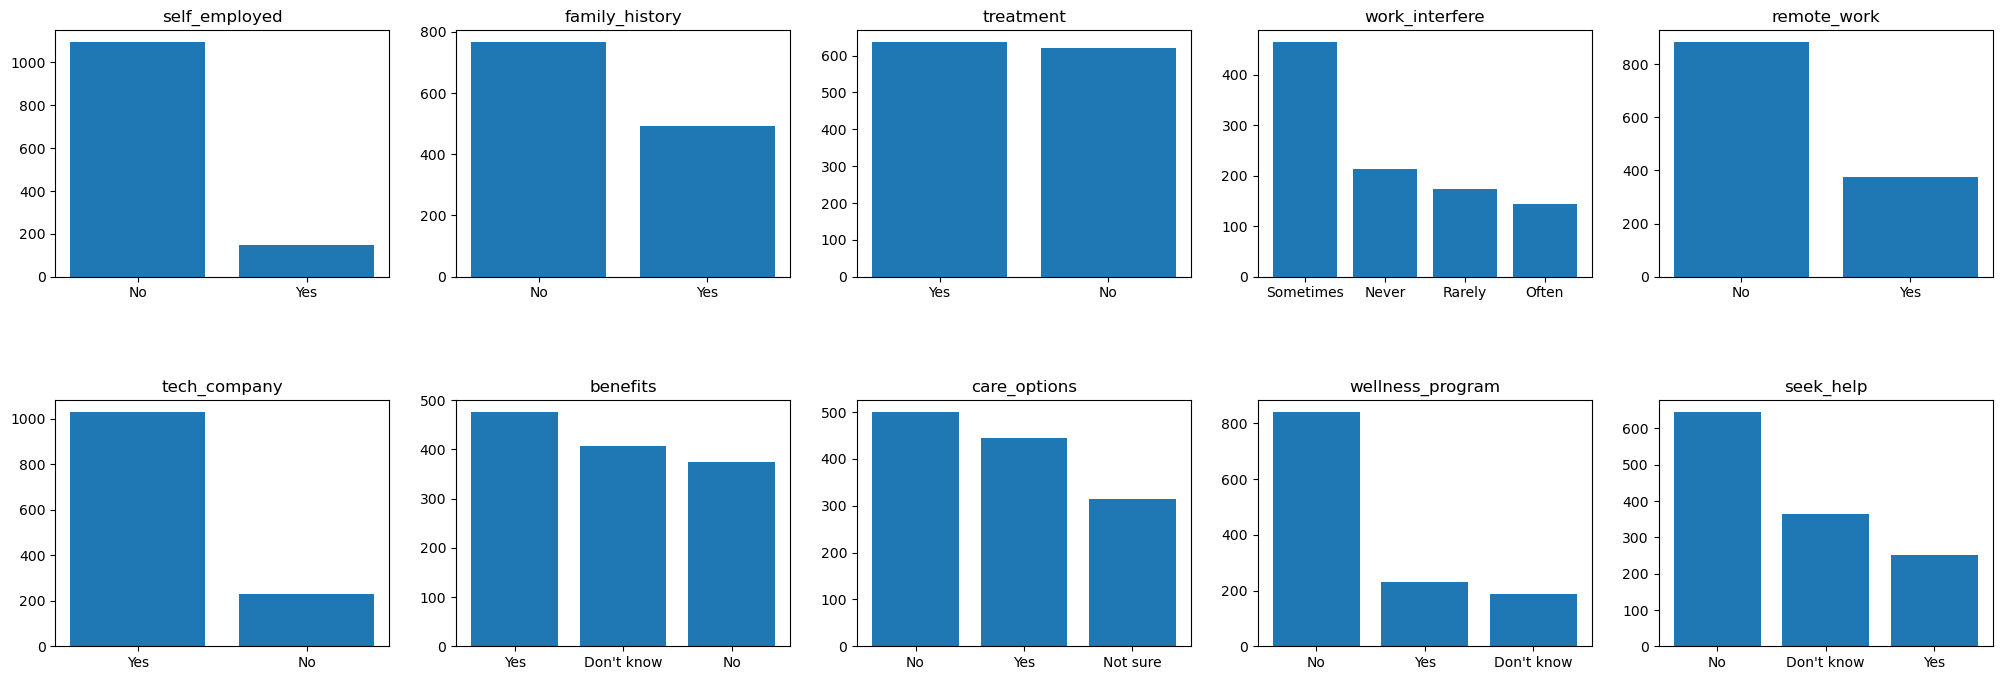

In [62]:
include_cols = ['self_employed',
       'family_history', 'treatment', 'work_interfere',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help']

fig, axs = plt.subplots(2, 5, figsize=(25, 8))

# Loop over each column in include_cols and plot it
for i, col in enumerate(include_cols):
    row = i // 5
    col = i % 5
    '''as we create the figure size like a matrix with 2 rows and 5 columns
    we need to know the index of each figure by row and column so it will be updated each iteration'''

    # we will used value_count() to know the number of rows for each value on the dataset as we mentioned before
    counts = data[include_cols[i]].value_counts()


    axs[row, col].bar(counts.index, counts.values)
    axs[row, col].set_title(include_cols[i])

# making a space between plots
plt.subplots_adjust(hspace=0.5, wspace=0.2)

plt.show()

# Cleaning Data
as we see before , the data is not clean so we need to prepare data for analysis by removing or modifying data that is incorrect, incomplete, irrelevant, duplicated, or improperly formatted

this will be done within severel ways so let's starts

## 1- drop unneeded columns


In [63]:
data = data.drop(['state','Country','Timestamp','comments'],axis=1)

In [64]:
#saving the new column names and number
n_cols = data.shape[1]
col_names = data.columns
col_names

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [65]:
n_cols

23

## 2- set the labels of the columns


In [66]:
#for loop within all cols we saved before to make it all lowercase
for col in col_names :
    data.rename(columns={col: col.lower()}, inplace=True)
col_names = data.columns
col_names

Index(['age', 'gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

now no inconsistent column names

## 3-  Handling Missing Values

In [67]:
# get the number of missing data per each column
missing_count = data.isnull().sum()

# look at the number of missing points in the columns
missing_count[0:n_cols]

age                            0
gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [68]:
#get the percentage of missing values
n_missing = missing_count.sum()
n_cells = np.product(data.shape)
(n_missing/n_cells)*100

0.9738577891356148

 ### filling missing values

In [69]:
#at the self employed column there are small number of nan values and it someway equevlent to no so we will replace it
data['self_employed'] = data['self_employed'].fillna("No")
#the other nan values can be treated in many ways , i choose to drop them
data = data.dropna()
data

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,No,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,No,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,No,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,No,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,No,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,29,male,No,Yes,Yes,Sometimes,100-500,Yes,Yes,Yes,...,Yes,Don't know,Yes,No,Some of them,No,No,Maybe,No,No
1253,36,Male,No,Yes,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No


In [70]:
#calculating percentage of missing values after handling them
missing_count = data.isnull().sum()
n_missing = missing_count.sum()
n_cells = np.product(data.shape)
(n_missing/n_cells)*100

0.0

No missing values now

## 4- Editing inconsistent data

In [71]:
#get the unique values of column gender to check if there is inconsistent data
#data ['gender'].unique()
gender_v = pd.DataFrame(data ['gender'])
gender_v.value_counts()

gender                                        
Male                                              481
male                                              157
Female                                            106
M                                                  87
female                                             53
F                                                  31
m                                                  23
f                                                  13
Make                                                4
Male                                                3
Cis Male                                            2
Female                                              2
Female (trans)                                      2
femail                                              1
fluid                                               1
cis-female/femme                                    1
A little about you                                  1
male leaning androgynous           

there are many weird values , we need it to be only female & male

#### Setting all possible values to only Male & Female

In [72]:
data.loc[data['gender'].str.contains('^M.*', regex=True, na=False), 'gender'] = 'Male'
data.loc[data['gender'].str.contains('Woman', regex=True, case=False, na=False), 'gender'] = 'Female'
data.loc[data['gender'].str.contains('F', case=False, na=False), 'gender'] = 'Female'
data.loc[data['gender'].str.contains('Man', regex=True, na=False), 'gender'] = 'Male'
data.loc[data['gender'].str.contains('^male', case=True,regex=True, na=False), 'gender'] = 'Male'
#data.loc[data['gender'].str.contains('Male', case=False,regex=True, na=False), 'gender'] = 'Male'

In [73]:
data ['gender'].unique()

array(['Female', 'Male', 'm', 'Cis Male', 'queer/she/they', 'non-binary',
       'Nah', 'All', 'Enby', 'Genderqueer', 'Androgyne', 'Agender',
       'Guy (-ish) ^_^', 'msle', 'Neuter', 'queer', 'cis male',
       'A little about you', 'p',
       'ostensibly male, unsure what that really means'], dtype=object)

the other values is unknown so we will drop it

In [74]:
data = data.drop(data[~data['gender'].isin(['Female', 'Male'])].index)
data ['gender'].unique()

array(['Female', 'Male'], dtype=object)

### we need to check the inconsistency for each column

In [75]:
for col in col_names :
    unique = data[col].unique()
    print(f"Unique values in column '{col}': {unique}")

Unique values in column 'age': [   37    44    32    31    33    35    39    42    23    29    36    27
    46    41    34    30    40    24    18    38    22    26    25    28
    45    21    19    43    56    54   329    55    57    58    48    47
    62    51    50    49    20 -1726    53    61    11    72    60]
Unique values in column 'gender': ['Female' 'Male']
Unique values in column 'self_employed': ['No' 'Yes']
Unique values in column 'family_history': ['No' 'Yes']
Unique values in column 'treatment': ['Yes' 'No']
Unique values in column 'work_interfere': ['Often' 'Rarely' 'Never' 'Sometimes']
Unique values in column 'no_employees': ['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']
Unique values in column 'remote_work': ['No' 'Yes']
Unique values in column 'tech_company': ['Yes' 'No']
Unique values in column 'benefits': ['Yes' "Don't know" 'No']
Unique values in column 'care_options': ['Not sure' 'No' 'Yes']
Unique values in column 'wellness_program': ['No' "Don't 

we see that the age column has negative values which dosen't make sense so we will apply a condition on it

In [76]:
data = data[data['age'] >= 10]
data

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,No,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,No,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,No,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,No,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,No,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,29,Male,No,Yes,Yes,Sometimes,100-500,Yes,Yes,Yes,...,Yes,Don't know,Yes,No,Some of them,No,No,Maybe,No,No
1253,36,Male,No,Yes,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,Male,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No


## 5- Editing some datatypes
no_employees column has a ranged values and it's type is string as we see

In [77]:
data['no_employees'].unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

so we will split the string to take the minimum number for each row

In [78]:
data_t = data
data.loc[data['no_employees'].str.contains('-', case=False, na=False), 'no_employees'] = data.loc[data['no_employees'].str.contains('-', case=False, na=False), 'no_employees'].str.split('-', expand=True)[0].astype(int)

In [79]:
data['no_employees'].unique()

array([6, 'More than 1000', 26, 100, 1, 500], dtype=object)

In [80]:
#another way to do this
for i, row in data_t.iterrows():
    if '-' in str(row['no_employees']):
        data_t.at[i
                  , 'no_employees'] = int(str(row['no_employees']).split('-')[0])
data_t['no_employees'].unique()

array([6, 'More than 1000', 26, 100, 1, 500], dtype=object)

### inconsistency still exist
so we will convert strings to the minimum too

In [81]:
for i, row in data.iterrows():
    if 'More than 1000' in str(row['no_employees']):
        data.at[i, 'no_employees'] = 1000
#set column type to int
data['no_employees'] = data['no_employees'].astype(int)
data['no_employees'].unique()

array([   6, 1000,   26,  100,    1,  500])

## 6- encoding data
encoding done by 2 ways : if you have columns which contains only 2 values like yes or no , true or false
you can do binary encoding ,
if there are more values so we will use one hot encoding

as we see the data unique values before .. there is some columns which has only 2 values
so we will apply binary encoding at first

In [82]:
lb = LabelBinarizer()

for col in [ 'gender', 'self_employed', 'family_history', 'treatment','remote_work', 'tech_company','obs_consequence']:
    data[col] = lb.fit_transform(data[col])

In [83]:
#now we need to split the data before one hot encoding to compare the error before & after
not_hot = data.dtypes == int
not_hot_cols = data.columns[not_hot]
not_hot_data = data.iloc[:, np.where(data.columns.isin(not_hot_cols))[0]]

In [84]:
data.head(1).T

,0
age,37
gender,0
self_employed,0
family_history,0
treatment,1
work_interfere,Often
no_employees,6
remote_work,0
tech_company,1
benefits,Yes


now we see that some columns has been converted to int  

In [85]:
#checking what will be the shape if we did one hot encoding
pd.get_dummies(data).shape

(953, 54)

we need to calculate number of don't know values to decide what to do

In [86]:
for col in col_names:
    num_dont_know = sum(data[col] == "Don't know")
    print(f"{col} has {num_dont_know} 'don't know' values")

## or data['col'].value_counts() will give us an over view for the data of the column

age has 0 'don't know' values
gender has 0 'don't know' values
self_employed has 0 'don't know' values
family_history has 0 'don't know' values
treatment has 0 'don't know' values
work_interfere has 0 'don't know' values
no_employees has 0 'don't know' values
remote_work has 0 'don't know' values
tech_company has 0 'don't know' values
benefits has 286 'don't know' values
care_options has 0 'don't know' values
wellness_program has 133 'don't know' values
seek_help has 267 'don't know' values
anonymity has 610 'don't know' values
leave has 408 'don't know' values
mental_health_consequence has 0 'don't know' values
phys_health_consequence has 0 'don't know' values
coworkers has 0 'don't know' values
supervisor has 0 'don't know' values
mental_health_interview has 0 'don't know' values
phys_health_interview has 0 'don't know' values
mental_vs_physical has 424 'don't know' values
obs_consequence has 0 'don't know' values


there are a lot of them , so we cannot drop it

In [87]:
# Select the string columns to do one hot encoding
strr = data.dtypes == object
s_cols = data.columns[strr]

In [88]:
ex_cols = (data[s_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))
'''apply(lambda x: x.nunique()) applies the nunique() method to each column in the selected subset
and returns a pandas Series with the number of unique values in each column.'''
ex_cols -= 1
ex_cols.sum()
#number of additional cols

31

In [89]:
ex_cols
## to get the columns names u can try (ex_cols.index)
ex_cols.index


Index(['leave', 'work_interfere', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical'],
      dtype='object')

In [90]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [91]:
data_copy = data.copy()

In [92]:
#one hot encoding
#first we willl loop over all columns that must be encoded
for col in ex_cols.index:
    #first we will apply label encoder to assign unique number for each value
    col_x = LabelEncoder().fit_transform(data[col]).astype(int)
    #now we have to drop the column that will be replaced with some columns one for each value
    data_copy = data_copy.drop(col,axis=1)
    #now we apply one hot encoder on the selected column
    new_x = OneHotEncoder().fit_transform(col_x.reshape(-1,1))
    # we need to calculates the number of new columns
    n_new_x = new_x.shape[1]
    #givig each new column a nuique name
    name_new_x = ['_'.join([col, str(h)]) for h in range(n_new_x)]
    #create the new columns data frame
    new_df = pd.DataFrame(new_x.toarray(),index=data_copy.index,columns=name_new_x)
    #concatinate the new columns with the data
    data_copy = pd.concat([data_copy,new_df],axis=1)

In [93]:
#priint data after one hot encoding
data_copy

,age,gender,self_employed,family_history,treatment,no_employees,remote_work,tech_company,obs_consequence,leave_0,...,supervisor_2,mental_health_interview_0,mental_health_interview_1,mental_health_interview_2,phys_health_interview_0,phys_health_interview_1,phys_health_interview_2,mental_vs_physical_0,mental_vs_physical_1,mental_vs_physical_2
0,37,0,0,0,1,6,0,1,0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,44,1,0,0,0,1000,0,0,0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,32,1,0,0,0,6,0,1,0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,31,1,0,1,1,26,0,1,1,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,31,1,0,0,0,100,1,1,0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,29,1,0,1,1,100,1,1,0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1253,36,1,0,1,0,1000,0,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1255,32,1,0,1,1,26,1,1,0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1256,34,1,0,1,1,1000,0,1,0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [94]:
##another way for one hot encoding

encoded_data = pd.get_dummies(data)
encoded_data
# this function get dummies apply one hot encoding to all of the categorical columns in the dataset

encoded_cols = list(encoded_data.columns)
data_2 = pd.concat([data, encoded_data], axis=1)
'''now we concatenated the encoded data with the original data
so the original column and the encoded is exist too, we need to remove the orginal '''
data_2.drop(ex_cols.index, axis=1, inplace=True)

data_2


,age,gender,self_employed,family_history,treatment,no_employees,remote_work,tech_company,obs_consequence,age,...,supervisor_Yes,mental_health_interview_Maybe,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes
0,37,0,0,0,1,6,0,1,0,37,...,1,0,1,0,1,0,0,0,0,1
1,44,1,0,0,0,1000,0,0,0,44,...,0,0,1,0,0,1,0,1,0,0
2,32,1,0,0,0,6,0,1,0,32,...,1,0,0,1,0,0,1,0,1,0
3,31,1,0,1,1,26,0,1,1,31,...,0,1,0,0,1,0,0,0,1,0
4,31,1,0,0,0,100,1,1,0,31,...,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,29,1,0,1,1,100,1,1,0,29,...,0,0,1,0,1,0,0,0,1,0
1253,36,1,0,1,0,1000,0,0,0,36,...,0,0,1,0,0,1,0,1,0,0
1255,32,1,0,1,1,26,1,1,0,32,...,1,0,1,0,0,1,0,0,0,1
1256,34,1,0,1,1,1000,0,1,0,34,...,0,0,1,0,0,1,0,0,1,0


In [95]:
data = data_copy
data

,age,gender,self_employed,family_history,treatment,no_employees,remote_work,tech_company,obs_consequence,leave_0,...,supervisor_2,mental_health_interview_0,mental_health_interview_1,mental_health_interview_2,phys_health_interview_0,phys_health_interview_1,phys_health_interview_2,mental_vs_physical_0,mental_vs_physical_1,mental_vs_physical_2
0,37,0,0,0,1,6,0,1,0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,44,1,0,0,0,1000,0,0,0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,32,1,0,0,0,6,0,1,0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,31,1,0,1,1,26,0,1,1,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,31,1,0,0,0,100,1,1,0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,29,1,0,1,1,100,1,1,0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1253,36,1,0,1,0,1000,0,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1255,32,1,0,1,1,26,1,1,0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1256,34,1,0,1,1,1000,0,1,0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [96]:
data = data.astype(int)
data.dtypes

age                            int32
gender                         int32
self_employed                  int32
family_history                 int32
treatment                      int32
no_employees                   int32
remote_work                    int32
tech_company                   int32
obs_consequence                int32
leave_0                        int32
leave_1                        int32
leave_2                        int32
leave_3                        int32
leave_4                        int32
work_interfere_0               int32
work_interfere_1               int32
work_interfere_2               int32
work_interfere_3               int32
benefits_0                     int32
benefits_1                     int32
benefits_2                     int32
care_options_0                 int32
care_options_1                 int32
care_options_2                 int32
wellness_program_0             int32
wellness_program_1             int32
wellness_program_2             int32
s

# 6- scaling data

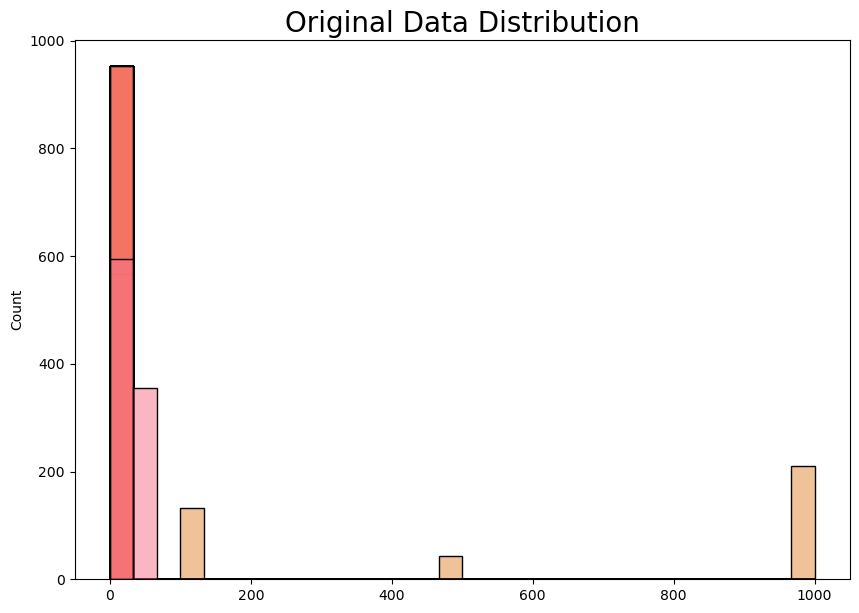

In [97]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the histogram using ax
sns.histplot(data, bins=30, ax=ax)
ax.set_title("Original Data Distribution", fontsize=20)
ax.get_legend().remove()
plt.show()

In [98]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

C:\Users\zizo\AppData\Local\Temp\ipykernel_40016\3621774574.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(normalized_data[:, 0], shade=True)


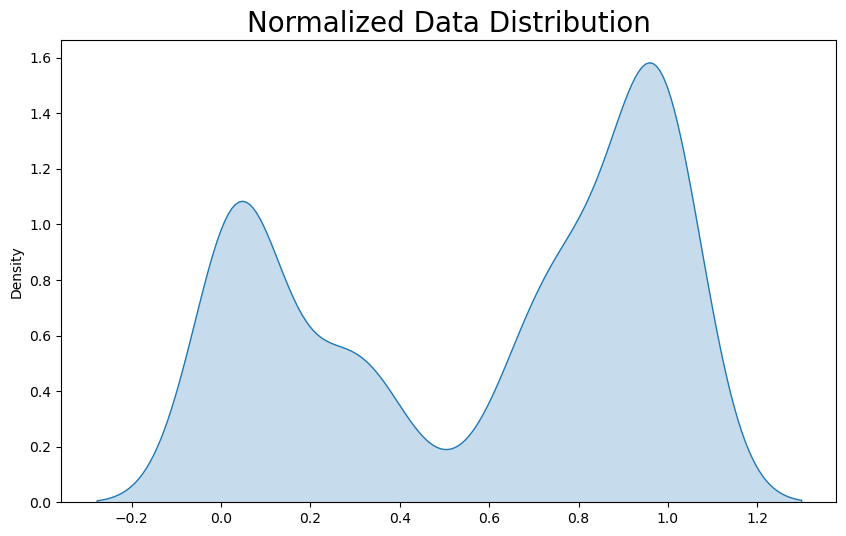

In [99]:
normalizer = Normalizer()
normalized_data = normalizer.fit_transform(data)


plt.figure(figsize=(10, 6))
sns.kdeplot(normalized_data[:, 0], shade=True)

plt.title("Normalized Data Distribution", fontsize=20)
plt.show()

### box-cox is a transformer used to change the distribution of the data to be normal ,
it can work on positive data only so we needed to shift any non positive value to positive at first ,
we apply shifting by subtract the minimum value from each value in the column ,
then we add a small constant to each value so that no zeros in our dataset

C:\Users\zizo\AppData\Local\Temp\ipykernel_40016\2881960572.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(transformed_data[:, 0], shade=True)


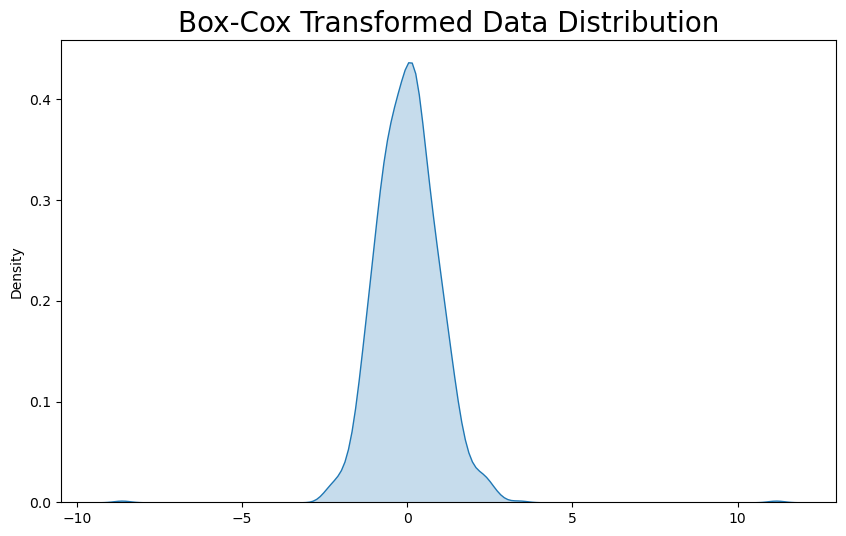

In [100]:
shifted_data = data - data.min(axis=0) + 1e-10

# Apply the Box-Cox transformation to the shifted data
transformer = PowerTransformer(method='box-cox', standardize=True)
transformed_data = transformer.fit_transform(shifted_data)

plt.figure(figsize=(10, 6))
sns.kdeplot(transformed_data[:, 0], shade=True)
plt.title("Box-Cox Transformed Data Distribution", fontsize=20)
plt.show()

##### StandardScaler
is a technique for scaling data that transforms the data to have a mean of 0 and a standard deviation of 1
by subtracting the mean of each feature and dividing by its standard deviation
##### MinMaxScaler
is a technique for scaling data that transforms the data to a fixed range between 0 and 1
by subtracting the minimum value of each feature and dividing by the range (maximum value minus minimum value) of each feature.
##### RobustScaler
is a technique for scaling data that is more robust to outliers and non-normal distributions
by subtracting the median of each feature and dividing by the interquartile range (IQR) of each feature.

C:\Users\zizo\AppData\Local\Temp\ipykernel_40016\3588464869.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=standard_data[:, 0], ax=axs[0], shade=True)
C:\Users\zizo\AppData\Local\Temp\ipykernel_40016\3588464869.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=roubset_data[:, 0], ax=axs[1], shade=True)
C:\Users\zizo\AppData\Local\Temp\ipykernel_40016\3588464869.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=minmax_data[:, 0], ax=axs[2], shade=True)


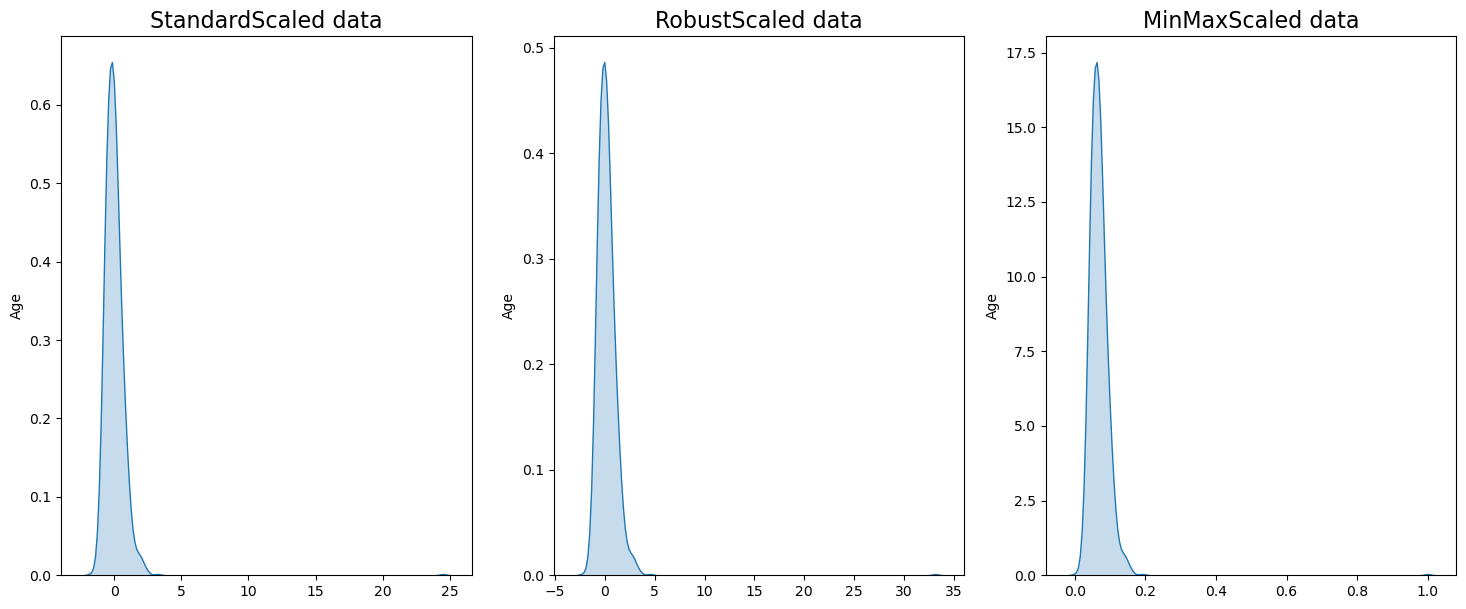

In [101]:
standard = StandardScaler()
standard_data = standard.fit_transform(data)

roubset = RobustScaler()
roubset_data = roubset.fit_transform(data)

minmax = MinMaxScaler()
minmax_data = minmax.fit_transform(data)

#sns.kdeplot(standard_data[:, 0], shade=True)
#plt.title("standard scalling Data Distribution", fontsize=20)
#plt.show()
fig, axs = plt.subplots(1, 3, figsize=(18, 7))

sns.kdeplot(data=standard_data[:, 0], ax=axs[0], shade=True)
sns.kdeplot(data=roubset_data[:, 0], ax=axs[1], shade=True)
sns.kdeplot(data=minmax_data[:, 0], ax=axs[2], shade=True)

axs[0].set_title('StandardScaled data', fontsize=16)
axs[1].set_title('RobustScaled data', fontsize=16)
axs[2].set_title('MinMaxScaled data', fontsize=16)

for i in [0,1,2] :
    axs[i].set_ylabel('Age')

plt.show()

##### convert these matrices to dataframes so we can work on it

In [102]:
normalized_data = pd.DataFrame(normalized_data,columns=data.columns)
transformed_data = pd.DataFrame (transformed_data,columns=data.columns)
standard_data = pd.DataFrame(standard_data, columns=data.columns)
roubset_data = pd.DataFrame(roubset_data, columns=data.columns)
minmax_data = pd.DataFrame(minmax_data, columns=data.columns)

# Spliting data
Now we need to split the data into train and test for each scaller

In [103]:
diff_data = {'Normalized data' : normalized_data,
             'Transformed data' : transformed_data,
             'StandardScaled data' : standard_data,
             'RobustScaled data' : roubset_data,
             'MinMaxScaled data' : minmax_data,
             'Not hot-encoded data' : not_hot_data
            }

y_col = 'treatment'

X_train_d = {}
X_test_d = {}
y_train_d = {}
y_test_d = {}

for key, value in diff_data.items():
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(value[[k for k in value.columns if k != y_col]],
                                                        data[y_col],
                                                        test_size=0.3,
                                                        random_state=42)

# Applying KNN model

In [104]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error


In [105]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [106]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 73.01349325337331 % and k = [5]


In [107]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 69.58041958041959 % and k = [7]


Result Visualisation

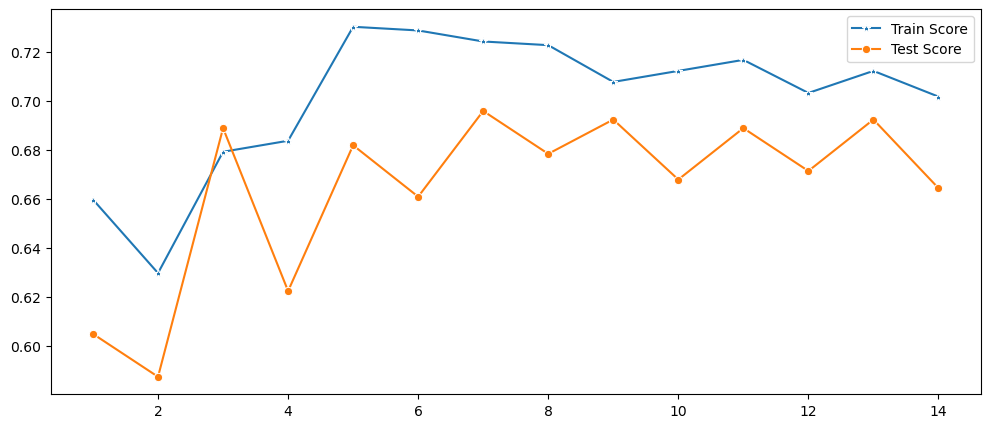

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Assuming train_scores and test_scores are defined appropriately

# Plotting train_scores
p = sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label='Train Score')

# Plotting test_scores on the same plot
p = sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Score')

plt.legend()  # Show legend
plt.show()


In [109]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.6888111888111889

In [110]:
from sklearn import metrics
def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)

    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])
model_evaluation(knn, X_test, y_test, 'Linear Reg.')

,Linear Reg.
MAE,0.311189
MSE,0.311189
RMSE,0.557843
R2-Score,-0.334067


In [111]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Assuming 'knn', 'value', 'width' are defined here or elsewhere within this loop
# Plot decision regions for the current iteration
plot_decision_regions(X_train.values, y_train.values, clf=knn, legend=2,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations or other plotting configurations if needed
plt.title(f'KNN with {key} Data')
plt.show()


ModuleNotFoundError: No module named 'mlxtend'

Confusion Matrix

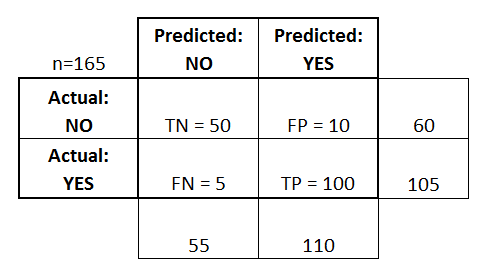

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

: 

In [ ]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

: 

Classification Report

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

: 

ROC - AUC

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

: 

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

: 

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

: 

In [112]:
# Get accuracy for model
print(clr.S+'Prediction Accuracy:'+clr.E, accuracy_score(Y_test, predictions))

NameError: name 'clr' is not defined